# 감성분석 - 사전

In [1]:
!pip install -U nbformat

Requirement already up-to-date: nbformat in c:\programdata\anaconda3\lib\site-packages (5.4.0)


## 파일 읽기

In [2]:
def read_data(filename, encoding = "cp949"):
  with open(filename, "r", encoding = encoding) as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:]
  return data

def write_data(data, filename, encoding = "cp949"):
  with open(filename, "w", encoding = encoding) as f:
    f.write(data)

data = read_data("C:\\Users\\Windows\\Desktop\\대학교\\4학년 여름방학\\Big_AI\\자연어처리\\pytest\\ratings.txt", encoding = 'cp949')

## 형태소 분석

In [3]:
import rhinoMorph
rn = rhinoMorph.startRhino()

morphed_data = ''
for data_each in data:
  morphed_data_each = rhinoMorph.onlyMorph_list(rn, data_each[1], pos = ['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'])
  joined_data_each = " ".join(morphed_data_each)
  if joined_data_each:
    morphed_data += data_each[0] + '\t' + joined_data_each + '\t' + data_each[2] + '\n'

write_data(morphed_data, 'C:\\Users\\Windows\\Desktop\\대학교\\4학년 여름방학\\Big_AI\\자연어처리\\pytest\\ratings_morphed.txt', encoding = 'cp949')

filepath:  C:\ProgramData\Anaconda3\Lib\site-packages
classpath:  C:\ProgramData\Anaconda3\Lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


In [4]:
data = read_data('C:\\Users\\Windows\\Desktop\\대학교\\4학년 여름방학\\Big_AI\\자연어처리\\pytest\\ratings_morphed.txt', encoding = 'cp949')
print(len(data))
print(len(data[0]))
print(data[0])

197559
3
['8132799', '디자인 배우 학생 외국 디자이너 일구 전통 통하 발전 문화 산업 부럽 사실 우리나라 그 어렵 시절 끝 열정 지키 노라노 같 전통 있 같 사람 꿈 꾸 이루 나가 있 감사', '1']


## 감정사전 읽기

In [5]:
data_id = [line[0] for line in data]
data_text = [line[1] for line in data]
data_senti = [line[2] for line in data]

positive = read_data('C:\\Users\\Windows\\Desktop\\대학교\\4학년 여름방학\\Big_AI\\자연어처리\\pytest\\positive.txt')
negative = read_data('C:\\Users\\Windows\\Desktop\\대학교\\4학년 여름방학\\Big_AI\\자연어처리\\pytest\\negative.txt')

print("positive : ", positive)
print("negative : ", negative)

pos_found = []
neg_found = []

positive :  [['가능'], ['가능하'], ['가락'], ['가치'], ['간단하'], ['간단히'], ['간직하'], ['간호'], ['간호하'], ['감동'], ['감사'], ['감사하'], ['감싸'], ['감탄하'], ['강화'], ['강화되'], ['강화하'], ['갚'], ['개방되'], ['개방하'], ['개선'], ['개선되'], ['개선하'], ['개혁'], ['거침없이'], ['건강'], ['건장하'], ['걸맞'], ['격려'], ['결심'], ['결심하'], ['결혼'], ['결혼하'], ['경감'], ['경감되'], ['공언'], ['공언하'], ['공정하'], ['관대하'], ['관리되'], ['굉장하'], ['구원'], ['굳'], ['귀엽'], ['귀하'], ['균형'], ['그치'], ['극복'], ['극복하'], ['근절되'], ['근절하'], ['긁'], ['긍정'], ['기념'], ['기대'], ['기부하'], ['기쁘'], ['기쁨'], ['기사도'], ['기적'], ['기회'], ['깨끗하'], ['꼼꼼하'], ['꽃'], ['꿀'], ['끌리'], ['나아가'], ['낙'], ['낫'], ['넓'], ['넓히'], ['노력'], ['노력하'], ['논리'], ['논의'], ['논의하'], ['놀랍'], ['놀이'], ['늘리'], ['다이아몬드'], ['다정'], ['다행히'], ['단장'], ['달래'], ['달콤하'], ['대단'], ['대담하'], ['대화'], ['덕'], ['도덕'], ['도전'], ['독립'], ['독립되'], ['돌보'], ['돕'], ['동의'], ['동의하'], ['되살리'], ['드라이브'], ['따르'], ['뚜렷하'], ['뛰어나'], ['띄우'], ['마법'], ['만족'], ['만족하'], ['맑'], ['맑음'], ['맛'], ['맛있'], ['맞'], ['맞추'], ['매력'], ['멋지'], ['메이저'], ['면밀히'], ['명백히'], ['명시되'], ['명예

## 감정단어 분석

In [6]:
def cntWordInLine(data, senti):
  senti_found = []
  for onedata in data:
    oneline_word = onedata.split(' ')
    senti_temp = 0
    for sentiword in senti:
      if sentiword[0] in oneline_word: # 매우 매우 매우 재밌었다와 매우 재밌었다를 동일하게 보고자 함
        senti_temp += 1
    senti_found.append(senti_temp)
  return senti_found

data_senti_poscnt = cntWordInLine(data_text, positive)
data_senti_negcnt = cntWordInLine(data_text, negative)

print("data_senti_poscnt : ", data_senti_poscnt[:20])
print("data_senti_negcnt : ", data_senti_negcnt[:20])

data_senti_poscnt :  [5, 1, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 0, 1, 0]
data_senti_negcnt :  [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]


## 감정점수 계산

In [7]:
import pandas as pd

newdata = pd.DataFrame({'id' : data_id, 'text' : data_text, 'original' : data_senti, "pos" : data_senti_poscnt, "neg" : data_senti_negcnt})
senti_score = newdata['pos'] - newdata['neg']
newdata['senti_score'] = senti_score

newdata.loc[newdata.senti_score > 0, 'new'] = 1
newdata.loc[newdata.senti_score <= 0, 'new'] = 0

newdata.loc[pd.to_numeric(newdata.original) == newdata.new, 'matched'] = 'True'
newdata.loc[pd.to_numeric(newdata.original) != newdata.new, 'matched'] = 'False'

## 원점수와 비교 및 저장

In [8]:
score = newdata.matched.str.count('True').sum() / (newdata.matched.str.count('True').sum() + newdata.matched.str.count('False').sum()) * 100

print(score)

62.60711989835948


In [9]:
newdata.to_csv("C:\\Users\\Windows\\Desktop\\대학교\\4학년 여름방학\\Big_AI\\자연어처리\\pytest\\newfile.csv", sep = ',', encoding = 'cp949', index = False)
newdata.to_csv("C:\\Users\\Windows\\Desktop\\대학교\\4학년 여름방학\\Big_AI\\자연어처리\\pytest\\newfile2.txt", sep = '\t', encoding = 'cp949', index = False)

시그모이드 점수 계산

In [10]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

newdata['sigmoid'] = newdata.senti_score.apply(sigmoid)

In [11]:
newdata.head()

,id,text,original,pos,neg,senti_score,new,matched,sigmoid
0,8132799,디자인 배우 학생 외국 디자이너 일구 전통 통하 발전 문화 산업 부럽 사실 우리나라...,1,5,1,4,1.0,True,0.982014
1,4655635,폴리스스토리 시리즈 뉴 없 최고,1,1,0,1,1.0,True,0.731059
2,9251303,와 연기 진짜 쩔 지루 생각하 몰입 그래 이런 진짜 영화,1,0,1,-1,0.0,False,0.268941
3,10067386,안개 자욱 하 밤하늘 뜨 초승달 같 영화,1,0,0,0,0.0,False,0.500000
4,2190435,사랑 해보 사람 처음 끝 웃 있 영화,1,2,0,2,1.0,True,0.880797


# 감성분석 - 머신러닝

In [12]:
def read_data(filename, encoding = "cp949"):
  with open(filename, "r", encoding = encoding) as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:]
  return data

def write_data(data, filename, encoding = "cp949"):
  with open(filename, "w", encoding = encoding) as f:
    f.write(data)

data = read_data('C:\\Users\\Windows\\Desktop\\대학교\\4학년 여름방학\\Big_AI\\자연어처리\\pytest\\ratings_morphed.txt', encoding = 'cp949')
print(len(data))
print(len(data[0]))
print(data[0])

197559
3
['8132799', '디자인 배우 학생 외국 디자이너 일구 전통 통하 발전 문화 산업 부럽 사실 우리나라 그 어렵 시절 끝 열정 지키 노라노 같 전통 있 같 사람 꿈 꾸 이루 나가 있 감사', '1']


## 훈련데이터와 테스트데이터 분리

In [13]:
data_text = [line[1] for line in data]
data_senti = [line[2] for line in data]

from sklearn.model_selection import train_test_split # sklearn은 7.5, 2.5 train_size나 test_size로 조절 가능 
train_data_text, test_data_text, train_data_senti, test_data_senti = train_test_split(data_text, data_senti, stratify = data_senti) # 독립 : text, 종속 : senti, 층화추출(train_data label이랑 test_data label이랑 비율이 동일하게 나옴) 사용

from collections import Counter
train_data_senti_freq = Counter(train_data_senti)
print("train_data_senti_freq : ", train_data_senti_freq)

test_data_senti_freq = Counter(test_data_senti)
print("test_data_senti_freq : ", test_data_senti_freq)

train_data_senti_freq :  Counter({'1': 74115, '0': 74054})
test_data_senti_freq :  Counter({'1': 24705, '0': 24685})


## 행렬 형태로 변환

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df = 5).fit(train_data_text) # 최소 빈도 5이상의 단어만 대상 (vect는 .pickle로 저장가능)
X_train = vect.transform(train_data_text)
print("X_train : \n", repr(X_train))

X_train : 
 <148169x11762 sparse matrix of type '<class 'numpy.int64'>'
	with 829967 stored elements in Compressed Sparse Row format>


In [15]:
feature_names = vect.get_feature_names()

print("특성 개수 : \n", len(feature_names))
print("처음 20개 특성 : \n", feature_names[:20])
print("3000~5000까지의 특성 : \n", feature_names[3000:5000])

특성 개수 : 
 11762
처음 20개 특성 : 
 ['10점', '1빠', 'cgv', 'ebs', 'jtbc', 'kbs', 'la', 'mb', 'mbc', 'naver', 'ok', 'sbs', 'sns', 'tv', 'usb', 'ㄱㅅ', 'ㄴㄴ', 'ㄷㄷ', 'ㅂㄷㅂㄷ', 'ㅂㅅ']
3000~5000까지의 특성 : 
 ['리버', '리베라', '리뷰', '리브', '리브스', '리사', '리스', '리스트', '리슨', '리안', '리암', '리액션', '리언', '리얼', '리얼리즘', '리얼리티', '리오', '리우', '리즈', '리차드', '리처드', '리치', '리콜', '리키', '리턴', '리틀', '리포터', '리포트', '리플', '리플리', '리허설', '린다', '린이', '린제이', '린지', '린치', '릴리', '링컨', '링크', '마가', '마가렛', '마감', '마고', '마구', '마구잡이', '마귀', '마나', '마냥', '마네', '마네킹', '마녀', '마녀사냥', '마누라', '마니아', '마담', '마당', '마더', '마돈나', '마동석', '마디', '마땅', '마라톤', '마력', '마련', '마루', '마르', '마른', '마리', '마리아', '마리오', '마리옹', '마린', '마릴린', '마마', '마모루', '마무리', '마미', '마법', '마법사', '마블', '마비', '마빡', '마사', '마사미', '마샬', '마수리', '마술', '마술사', '마스', '마스크', '마스터', '마시', '마실', '마약', '마왕', '마우스', '마을', '마음', '마음껏', '마음대로', '마음속', '마음씨', '마의', '마이', '마이너', '마이너리티', '마이너스', '마이애미', '마이어스', '마이크', '마이클', '마인', '마인드', '마일리지', '마저', '마주', '마주치', '마주하', '마중', '마지', '마지막', '마징가', '마차', '마찬가지', '마초'

## 머신러닝 알고리즘 적용

In [16]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
y_train = pd.Series(train_data_senti) # Series나 Numpy array로 넣기

lr = LogisticRegression(solver = "liblinear")
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [17]:
# vect = CountVectorizer(min_df = 5).fit(test_data_text)를 수행해서는 안된다. -> test data의 5개 이상 값이 train data의 5개 이상 값과 다르기 때문
X_test = vect.transform(test_data_text)
y_test = pd.Series(test_data_senti)
print("테스트 데이터 점수 : ", lr.score(X_test, y_test))

테스트 데이터 점수 :  0.8088074509009922


# 1개 데이터 예측

In [18]:
import rhinoMorph
rn = rhinoMorph.startRhino()

new_input = "즐거운 하루!"
inputdata = []
morphed_input = rhinoMorph.onlyMorph_list(rn, new_input, pos = ['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'])
morphed_input = ' '.join(morphed_input)

inputdata.append(morphed_input)
print('input data : ', inputdata)

filepath:  C:\ProgramData\Anaconda3\Lib\site-packages
classpath:  C:\ProgramData\Anaconda3\Lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!
input data :  ['즐겁 하루']


In [19]:
X_input = vect.transform(inputdata)
result = lr.predict(X_input)

if result == 0:
  print("부정적인 글입니다.")
else:
  print("긍정적인 글입니다.")

긍정적인 글입니다.


# 딥러닝 이해 1

## Mnist 데이터

In [20]:
from keras.datasets import mnist
((train_images, train_labels), (test_images, test_labels)) = mnist.load_data()

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [21]:
import numpy as np

print(type(test_images))
np.set_printoptions(linewidth=np.inf)
print(test_images[1])

<class 'numpy.ndarray'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   

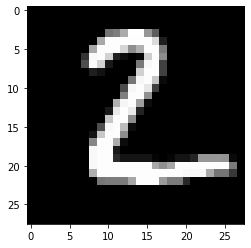

In [22]:
import matplotlib.pyplot as plt
plt.imshow(test_images[1], cmap = 'gray')

In [23]:
print(len(test_labels))
print(test_labels)

10000
[7 2 1 ... 4 5 6]


## 모델 생성

In [24]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(256, activation = 'relu', input_shape = (28*28,))) # 대부분 Dense의 Cell 갯수는 2의 n승을 많이 사용
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = "rmsprop", metrics = ["accuracy"]) # 이진 분류는 binary_crossentropy, 다중 분류는 categorical_crossentropy
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


## 데이터 전처리

In [25]:
train_images = train_images.reshape(60000, 28*28)
train_images = train_images.astype('float32') / 255.

test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype('float32') / 255.

In [26]:
np.set_printoptions(linewidth=310)
print(test_images[1]) # 출력은 강제로 조절해서 2차원처럼 보이지만 실제 데이터는 1차원

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.      

In [27]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels) # 값을 확률로 표현
test_labels = to_categorical(test_labels)

## 데이터 학습

In [28]:
model.fit(train_images, train_labels, epochs = 5, batch_size = 128) # epoch : 훈련 로테이션 횟수, batch_size : 한번에 훈련할 데이터의 양(메모리 한계와 속도 저하 문제)
# 이론적으론 batch_size를 나누지 않는 게 좋으나, 현실적으로는 매우 큰 데이터를 다루기 때문에 불가능하다. batch_size는 8 ~ 512개가 적당하다.

Epoch 1/5
469/469 [==============================] - 6s 6ms/step - loss: 0.2860 - accuracy: 0.9193
Epoch 2/5
469/469 [==============================] - 3s 5ms/step - loss: 0.1273 - accuracy: 0.9629
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0870 - accuracy: 0.9742
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0650 - accuracy: 0.9808
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0508 - accuracy: 0.9845


## 예측

In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc : ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0773 - accuracy: 0.9773
test_acc :  0.9772999882698059


# 딥러닝 이해 2

## 0D Tensor (Scalar)

In [30]:
import numpy as np

x = np.array(12)
print(type(x))
print(x.ndim)

<class 'numpy.ndarray'>
0


## 1D Tensor (Vector)

In [31]:
import numpy as np

x = np.array([12, 35, 23])
print(type(x))
print(x.ndim)

<class 'numpy.ndarray'>
1


## 2D Tensor (Matrix)

In [32]:
import numpy as np

x = np.array([[12, 35, 23], [4, 63, 7], [5, 28, 4]])
print(type(x))
print(x.ndim)

<class 'numpy.ndarray'>
2


## 3D & High-Dimensional Tensor

In [33]:
import numpy as np

x = np.array([[[12, 35, 23], [4, 63, 7], [5, 28, 4]], [[12, 35, 23], [4, 63, 7], [5, 28, 4]], [[12, 35, 23], [4, 63, 7], [5, 28, 4]]])
print(type(x))
print(x.ndim)

<class 'numpy.ndarray'>
3


In [34]:
import numpy as np

x = np.array([[[[12, 35, 23], [4, 63, 7], [5, 28, 4]], [[12, 35, 23], [4, 63, 7], [5, 28, 4]], [[12, 35, 23], [4, 63, 7], [5, 28, 4]]],
              [[[12, 35, 23], [4, 63, 7], [5, 28, 4]], [[12, 35, 23], [4, 63, 7], [5, 28, 4]], [[12, 35, 23], [4, 63, 7], [5, 28, 4]]],
              [[[12, 35, 23], [4, 63, 7], [5, 28, 4]], [[12, 35, 23], [4, 63, 7], [5, 28, 4]], [[12, 35, 23], [4, 63, 7], [5, 28, 4]]]])
print(type(x))
print(x.ndim)

<class 'numpy.ndarray'>
4


In [35]:
import numpy as np

x = np.array([[[[[12, 35, 23], [4, 63, 7], [5, 28, 4]], [[12, 35, 23], [4, 63, 7], [5, 28, 4]], [[12, 35, 23], [4, 63, 7], [5, 28, 4]]],
              [[[12, 35, 23], [4, 63, 7], [5, 28, 4]], [[12, 35, 23], [4, 63, 7], [5, 28, 4]], [[12, 35, 23], [4, 63, 7], [5, 28, 4]]],
              [[[12, 35, 23], [4, 63, 7], [5, 28, 4]], [[12, 35, 23], [4, 63, 7], [5, 28, 4]], [[12, 35, 23], [4, 63, 7], [5, 28, 4]]]],
              [[[[12, 35, 23], [4, 63, 7], [5, 28, 4]], [[12, 35, 23], [4, 63, 7], [5, 28, 4]], [[12, 35, 23], [4, 63, 7], [5, 28, 4]]],
              [[[12, 35, 23], [4, 63, 7], [5, 28, 4]], [[12, 35, 23], [4, 63, 7], [5, 28, 4]], [[12, 35, 23], [4, 63, 7], [5, 28, 4]]],
              [[[12, 35, 23], [4, 63, 7], [5, 28, 4]], [[12, 35, 23], [4, 63, 7], [5, 28, 4]], [[12, 35, 23], [4, 63, 7], [5, 28, 4]]]],
              [[[[12, 35, 23], [4, 63, 7], [5, 28, 4]], [[12, 35, 23], [4, 63, 7], [5, 28, 4]], [[12, 35, 23], [4, 63, 7], [5, 28, 4]]],
              [[[12, 35, 23], [4, 63, 7], [5, 28, 4]], [[12, 35, 23], [4, 63, 7], [5, 28, 4]], [[12, 35, 23], [4, 63, 7], [5, 28, 4]]],
              [[[12, 35, 23], [4, 63, 7], [5, 28, 4]], [[12, 35, 23], [4, 63, 7], [5, 28, 4]], [[12, 35, 23], [4, 63, 7], [5, 28, 4]]]]])
print(type(x))
print(x.ndim)

<class 'numpy.ndarray'>
5


# 감성분석 - 딥러닝

In [37]:
import rhinoMorph
rn = rhinoMorph.startRhino()

morphed_data = ''
for data_each in data:
  morphed_data_each = rhinoMorph.onlyMorph_list(rn, data_each[1], pos = ['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'])
  joined_data_each = " ".join(morphed_data_each)
  if joined_data_each:
    morphed_data += data_each[0] + '\t' + joined_data_each + '\t' + data_each[2] + '\n'

write_data(morphed_data, 'C:\\Users\\Windows\\Desktop\\대학교\\4학년 여름방학\\Big_AI\\자연어처리\\pytest\\ratings_morphed.txt', encoding = 'cp949')

filepath:  C:\ProgramData\Anaconda3\Lib\site-packages
classpath:  C:\ProgramData\Anaconda3\Lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


In [38]:
data = read_data('C:\\Users\\Windows\\Desktop\\대학교\\4학년 여름방학\\Big_AI\\자연어처리\\pytest\\ratings_morphed.txt', encoding = 'cp949')
print(len(data))
print(len(data[0]))
print(data[0])

197481
3
['4655635', '폴리스스토리 시리즈 뉴 없 최고', '1']


## 데이터 분리

In [39]:
from sklearn.model_selection import train_test_split

data_text = [line[1] for line in data]
data_senti = [line[2] for line in data]

train_data_text, test_data_text, train_data_senti, test_data_senti = train_test_split(data_text, data_senti, stratify = data_senti)

In [40]:
from collections import Counter
train_data_senti_freq = Counter(train_data_senti)
print("train_data_senti_freq : ", train_data_senti_freq)

test_data_senti_freq = Counter(test_data_senti)
print("test_data_senti_freq : ", test_data_senti_freq)

train_data_senti_freq :  Counter({'1': 74101, '0': 74009})
test_data_senti_freq :  Counter({'1': 24701, '0': 24670})


In [41]:
import numpy as np

text_len = [len(line.split(' ')) for line in train_data_text]
print("최소길이 : ", np.min(text_len))
print("최대길이 : ", np.max(text_len))
print("평균길이 : ", np.round(np.mean(text_len), 1))
print("중위수길이 : ", np.median(text_len))
print("구간별 최대 길이 : ", np.percentile(text_len, [0, 25, 50, 75, 90, 100])) # 90%인 20개를 담는 게 좋아 보임
print("최소 길이 문장 : ", train_data_text[np.argmin(text_len)])
print("최대 길이 문장 : ", train_data_text[np.argmax(text_len)])

최소길이 :  1
최대길이 :  70
평균길이 :  8.7
중위수길이 :  7.0
구간별 최대 길이 :  [ 1.  4.  7. 11. 18. 70.]
최소 길이 문장 :  좋
최대 길이 문장 :  ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ ㅋㅋ


## 데이터 Tokenizing

In [44]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import numpy as np
import math

max_words = 10000
maxlen = 20

tokenizer = Tokenizer(num_words = max_words) # 상위 빈도 10000개가 적절
tokenizer.fit_on_texts(train_data_text)
word_index = tokenizer.word_index

In [45]:
print("전체에서 %s개의 고유한 토큰을 찾았습니다." % len(word_index)) # 상위 10000개(사실상 9999개)의 인덱스 정보는 확보했지만, 우선 전체를 보여줌
print("word_index type : ", type(word_index))
print("word_index : ", word_index) # tokenizer는 0번 index를 사용하지 않음 (후에 padding을 0으로 하기 위함)
# 불용어 처리를 하지 않는 게 일반적

전체에서 32746개의 고유한 토큰을 찾았습니다.
word_index type :  <class 'dict'>
word_index :  {'영화': 1, '하': 2, '보': 3, '없': 4, '재미있': 5, 'ㅋㅋ': 6, '너무': 7, '좋': 8, '되': 9, '정말': 10, '있': 11, '같': 12, '진짜': 13, '만들': 14, '말': 15, '연기': 16, '나오': 17, '최고': 18, '평점': 19, '알': 20, '다': 21, 'ㅋ': 22, '안': 23, '왜': 24, '이': 25, '생각': 26, '가': 27, '이런': 28, '잘': 29, '스토리': 30, '주': 31, '드라마': 32, '때': 33, '사람': 34, '더': 35, '배우': 36, '지루': 37, '내용': 38, '좀': 39, '그냥': 40, '아깝': 41, '감독': 42, '재미': 43, 'ㅠㅠ': 44, '시간': 45, '재미없': 46, '감동': 47, '쓰레기': 48, '다시': 49, '모르': 50, '처음': 51, '작품': 52, '아': 53, '들': 54, '사': 55, '사랑': 56, '마지막': 57, '액션': 58, '그': 59, '참': 60, '기대': 61, '많': 62, '못하': 63, '완전': 64, '정도': 65, '이야기': 66, '느끼': 67, '이렇게': 68, '못': 69, '최악': 70, '별로': 71, 'ㅎㅎ': 72, '남': 73, '장면': 74, '쓰': 75, '느낌': 76, '무슨': 77, '지금': 78, '돈': 79, '끝': 80, '10점': 81, '보이': 82, '그리고': 83, '마음': 84, '역시': 85, '명작': 86, '이해': 87, '좋아하': 88, '또': 89, '울': 90, '괜찮': 91, '한국': 92, '많이': 93, 'ㅡㅡ': 94, '주인공': 95, '여자

## 데이터 Sequencing

In [46]:
data = tokenizer.texts_to_sequences(train_data_text)

print("data 0 : ", data[0])
print("texts 0 : ", train_data_text[0])

data 0 :  [9556, 4583, 396, 1628, 2, 3203]
texts 0 :  김희애 데뷔 이후 유일 하 실패작


## 데이터 Padding

In [47]:
# 데이터 패팅은 많으면 잘라내고 없으면 채워준다는 특징이 있다.
data = pad_sequences(data, maxlen = maxlen)

print("data : ", data)
print("data 0 : ", data[0])
print("data 0의 길이 : ", len(data[0]))

data :  [[   0    0    0 ... 1628    2 3203]
 [   0    0    0 ...    1  667 1153]
 [   0    0    0 ...   21  350   75]
 ...
 [   0    0    1 ... 2885   16   47]
 [   0    0    0 ...   13  776    1]
 [ 561   77 1171 ... 4193 4193    4]]
data 0 :  [   0    0    0    0    0    0    0    0    0    0    0    0    0    0 9556 4583  396 1628    2 3203]
data 0의 길이 :  20


In [48]:
print(type(train_data_text)) # list
print(type(data)) # numpy
print(data.shape)

<class 'list'>
<class 'numpy.ndarray'>
(148110, 20)


## One-Hot Encoding

In [49]:
import numpy as np

sample = [[5, 6, 7], [8, 9, 10]]
arr = np.zeros((len(sample), 10 + 1))
for i, seq in enumerate(sample):
  arr[i, seq] = 1.
print(arr)
# one-hot encoding을 거치며 빈도, 순서 정보 손실

[[0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [50]:
def to_one_hot(sequences, dimension):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

data = to_one_hot(data, dimension = max_words)
labels = np.asarray(train_data_senti).astype('float32')

In [51]:
print("data : ", data)
print(len(data[0]))
print("data[0][0:100] : ", data[0][0:100])

data :  [[1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
10000
data[0][0:100] :  [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## 훈련 데이터에서 검증데이터 분리

In [52]:
print(type(train_data_text))
print(type(data))
print(data.shape)

print("데이터 텐서의 차원 : ", data.ndim)
print("레이블 텐서의 차원 : ", labels.ndim)

print("데이터 텐서의 크기 : ", data.shape)
print("레이블 텐서의 크기 : ", labels.shape)

<class 'list'>
<class 'numpy.ndarray'>
(148110, 10000)
데이터 텐서의 차원 :  2
레이블 텐서의 차원 :  1
데이터 텐서의 크기 :  (148110, 10000)
레이블 텐서의 크기 :  (148110,)


In [53]:
validation_ratio = 0.3
validation_len = math.floor(len(train_data_text) * validation_ratio)

x_train = data[validation_len:]
y_train = labels[validation_len:]
x_val = data[:validation_len]
y_val = labels[:validation_len]

## 모델 설계 & 훈련

In [54]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(64, activation = 'relu', input_shape = (max_words, )))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary() # 파라미터의 개수를 확인 -> 너무 많으면 독립변수에 과적합 될 가능성이 크다.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                640064    
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 642,177
Trainable params: 642,177
Non-trainable params: 0
_________________________________________________________________


## 각종 값 저장

In [55]:
history = model.fit(x_train, y_train, epochs = 5, batch_size = 32, validation_data = (x_val, y_val))
history_dict = history.history

Epoch 1/5
3240/3240 [==============================] - 88s 27ms/step - loss: 0.4057 - acc: 0.8184 - val_loss: 0.3925 - val_acc: 0.8255
Epoch 2/5
3240/3240 [==============================] - 75s 23ms/step - loss: 0.3700 - acc: 0.8388 - val_loss: 0.3868 - val_acc: 0.8294
Epoch 3/5
3240/3240 [==============================] - 71s 22ms/step - loss: 0.3570 - acc: 0.8477 - val_loss: 0.3862 - val_acc: 0.8304
Epoch 4/5
3240/3240 [==============================] - 72s 22ms/step - loss: 0.3463 - acc: 0.8554 - val_loss: 0.3852 - val_acc: 0.8337
Epoch 5/5
3240/3240 [==============================] - 59s 18ms/step - loss: 0.3364 - acc: 0.8613 - val_loss: 0.3825 - val_acc: 0.8326


In [56]:
# CPU와 GPU를 구분해서 모델 생성해야 함
model.save("C:\\Users\\Windows\\Desktop\\대학교\\4학년 여름방학\\Big_AI\\자연어처리\\pytest\\text_binary_model.h5") # HDF 포맷

import pickle

with open("C:\\Users\\Windows\\Desktop\\대학교\\4학년 여름방학\\Big_AI\\자연어처리\\pytest\\text_binary_tokenizer.pickle", 'wb') as handle:
  pickle.dump(tokenizer, handle, protocol = pickle.HIGHEST_PROTOCOL)

## 모델 성능 확인

In [57]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

print("Train accuracy of each epoch : ", np.round(acc, 3))
print("Validation accuracy of each epoch : ", np.round(val_acc, 3))

Train accuracy of each epoch :  [0.818 0.839 0.848 0.855 0.861]
Validation accuracy of each epoch :  [0.826 0.829 0.83  0.834 0.833]


range(1, 6)


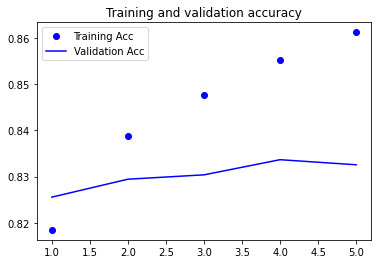

In [58]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)
print(epochs)

plt.plot(epochs, acc, 'bo', label = "Training Acc")
plt.plot(epochs, val_acc, 'b', label = "Validation Acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

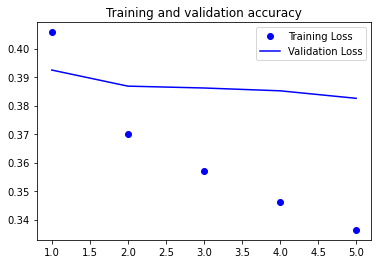

In [59]:
plt.figure()

plt.plot(epochs, loss, 'bo', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

## 모델 Load

In [60]:
import os
from keras.models import load_model

loaded_model = load_model("C:\\Users\\Windows\\Desktop\\대학교\\4학년 여름방학\\Big_AI\\자연어처리\\pytest\\text_binary_model.h5")
print("model loaded : ", loaded_model)

with open("C:\\Users\\Windows\\Desktop\\대학교\\4학년 여름방학\\Big_AI\\자연어처리\\pytest\\text_binary_tokenizer.pickle", 'rb') as handle:
  loaded_tokenizer = pickle.load(handle)

model loaded :  <keras.engine.sequential.Sequential object at 0x0000015B82010790>


## 테스트 데이터 평가과정

In [62]:
print(test_data_text[:10])
print(test_data_senti[:10])

['배경 음악 스토리 구성 어느 하 멋지 없', '빠 ㅎㅎ 꿀잼 ㅋㅋ 꼭 ^^', '평점 너무 높 10점 주 양심 없', '권총 속 장전 되 탄환 발사 되 연기 남기 사라지 청춘', '너무 재미있 ^^', '패 레디 제왕 레슬리 많이 늙 명백 사실', '형사 슬기 불쌍 ㅜㅜ', '댓글 보 10점 댓글 보 재미있 보 기대 이하 예술영화 좋아하 영상미 좋아하 고난 하 영화 즐기 난해 그냥 무모 건조 하 유머 코드 잘 안 맞 재미있 같 영아', '박 신 연기 말 없', '조원석 나오 개그 죄 민수 말 죄 민수']
['1', '1', '0', '1', '1', '0', '1', '0', '0', '0']


In [65]:
data = loaded_tokenizer.texts_to_sequences(test_data_text) # 당연히 훈련데이터에서 훈련시킨 모델 사용
data = pad_sequences(data, maxlen = maxlen)
x_test = to_one_hot(data, dimension = max_words)
y_test = np.asarray(test_data_senti).astype('float32')

In [66]:
test_eval = loaded_model.evaluate(x_test, y_test)

print("prediction model loss & acc : ", test_eval)

1543/1543 [==============================] - 11s 7ms/step - loss: 0.3809 - acc: 0.8352
prediction model loss & acc :  [0.3809095025062561, 0.8352473974227905]


데이터 예측해보기

In [ ]:
import rhinoMorph
rn = rhinoMorph.startRhino()

text = ["재미있게 잘 봤습니다."]
text = [rhinoMorph.onlyMorph_list(rn, sentense, pos = ['NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi = False) for sentense in text]
print("형태소 분석 결과 : ", text)

data = loaded_tokenizer.texts_to_sequences(text)
data = pad_sequences(data, maxlen = maxlen)
x_test = to_one_hot(data, dimension = max_words)

prediction = loaded_model.predict(x_test)
print("Result : ", prediction)

filepath:  C:\ProgramData\Anaconda3\Lib\site-packages
classpath:  C:\ProgramData\Anaconda3\Lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
